In [1]:
from pyimagesearch.preprocessing import ImageToArrayPreprocessor
from pyimagesearch.preprocessing import SimplePreprocessor
from pyimagesearch.datasets import SimpleDatasetLoader
from keras.models import load_model
from imutils import paths
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.
/data/tangle/pyimagesearch/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
classLabels = ["cat", "dog", "panda"]
imagePaths = np.array(list(paths.list_images("animals")))
idxs = np.random.randint(0, len(imagePaths), size=(10,))
imagePaths = imagePaths[idxs]

In [3]:
imagePaths

array(['animals/dogs/dogs_00344.jpg', 'animals/cats/cats_00082.jpg',
       'animals/dogs/dogs_00259.jpg', 'animals/panda/panda_00621.jpg',
       'animals/panda/panda_00304.jpg', 'animals/dogs/dogs_00100.jpg',
       'animals/dogs/dogs_00852.jpg', 'animals/cats/cats_00440.jpg',
       'animals/dogs/dogs_00218.jpg', 'animals/cats/cats_00968.jpg'],
      dtype='<U29')

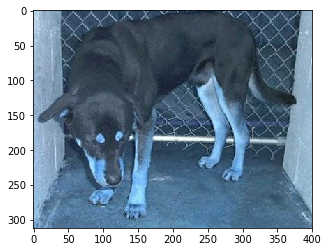

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
image = cv2.imread(imagePaths[0])
plt.imshow(image)

In [7]:
sp = SimplePreprocessor(32, 32)
iap = ImageToArrayPreprocessor()
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths)
data = data.astype("float") / 255.0

In [8]:
data.shape

(10, 32, 32, 3)

In [9]:
model = load_model("shallownet_weight.hdf5")

In [10]:
preds = model.predict(data, batch_size=32).argmax(axis=1)

In [11]:
preds

array([1, 1, 1, 2, 2, 1, 1, 0, 1, 1])

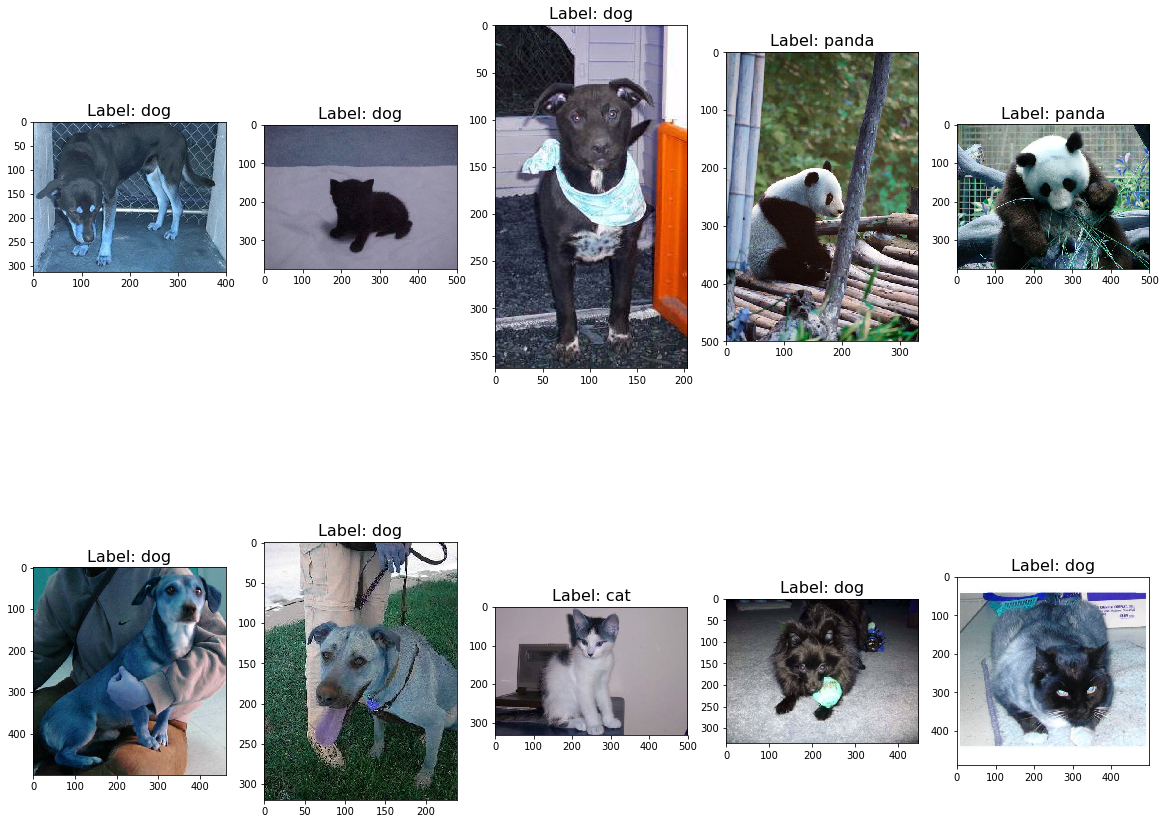

In [25]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 16.0)
for (i, imagePath) in enumerate(imagePaths):
    plt.subplot(2,5,i+1)
    image = cv2.imread(imagePath)
    plt.title("Label: {}".format(classLabels[preds[i]]),fontsize=16)
    plt.imshow(image)